In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

Example based on [this](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html).

Get some data...

In [3]:
# import some data to play with
iris = datasets.load_iris()

In [4]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
X = X[y<2]            # we only take two classes
y = y[y<2]            # we only take two classes

In [5]:
def plot_decision_boundary(X, y, regression):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

# Logistic regression

We can try different arguments for the *logreg* to see what happens...

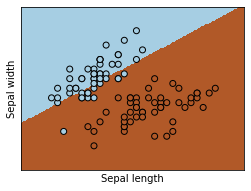

In [6]:
# create an instance of Logistic Regression Classifier
logreg = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=2).fit(X, y)
plot_decision_boundary(X, y, logreg)

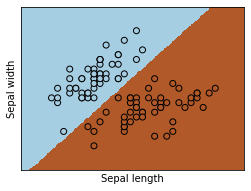

In [7]:
# update the number of iterations
logreg = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=20).fit(X, y)
plot_decision_boundary(X, y, logreg)